In [1]:
# General imports

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"


# Import pipeline
path_to_pipeline = "/root/MasterThesis/SBF_Pipeline/" # Fill in the path to the pipeline here

import sys
sys.path.append(path_to_pipeline)

from sbf_pipeline import sbfPipeline

# import warnings
# warnings.filterwarnings("error", category=RuntimeWarning)


In [2]:
# For the example, we run the algorithm for NGC 1404
path_NGC1404 = "data/NGC 1404"

# path in which the fits files for F110W band are stored
data_path_NGC1404_F160W = path_NGC1404 + "/F160W/drz"

# path where the files that are computed must be stored
file_path_NGC1404_F160W = path_NGC1404 + "/F160W/return_files_drz"

# path where the images must be stored
image_path_NGC1404_F160W = path_NGC1404 + "/F160W/images"


In [3]:
# import os
# data_folder = data_path_NGC1404_F160W + "/psf_files"
# for filename in os.listdir(data_folder):
#     if "raw" in filename:  # Check if "raw" is in the filename
#         file_path = os.path.join(data_folder, filename)
#         if os.path.isfile(file_path):  # Ensure it's a file, not a folder
#             os.remove(file_path)
#             print(f"Deleted: {file_path}")

Folder 'data/NGC 1404/F160W/return_files_drz' created in directory:
/root/MasterThesis/SBF_Pipeline/example
Folder 'data/NGC 1404/F160W/images' created in directory:
/root/MasterThesis/SBF_Pipeline/example

1. Extracting the data ...


/root/MasterThesis/SBF_Pipeline/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/root/MasterThesis/SBF_Pipeline/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:144: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


Folder 'data/NGC 1404/F160W/return_files_drz/1.extract_data' created in directory:
/root/MasterThesis/SBF_Pipeline/example

2. Estimating the background level ...
5.0 ()


  0%|          | 0/20 [00:00<?, ?it/s]

/root/MasterThesis/SBF_Pipeline/functions/backgroundmodel.py:44: RuntimeWarning: invalid value encountered in log10
  return np.log10(sersic_profile + noise)


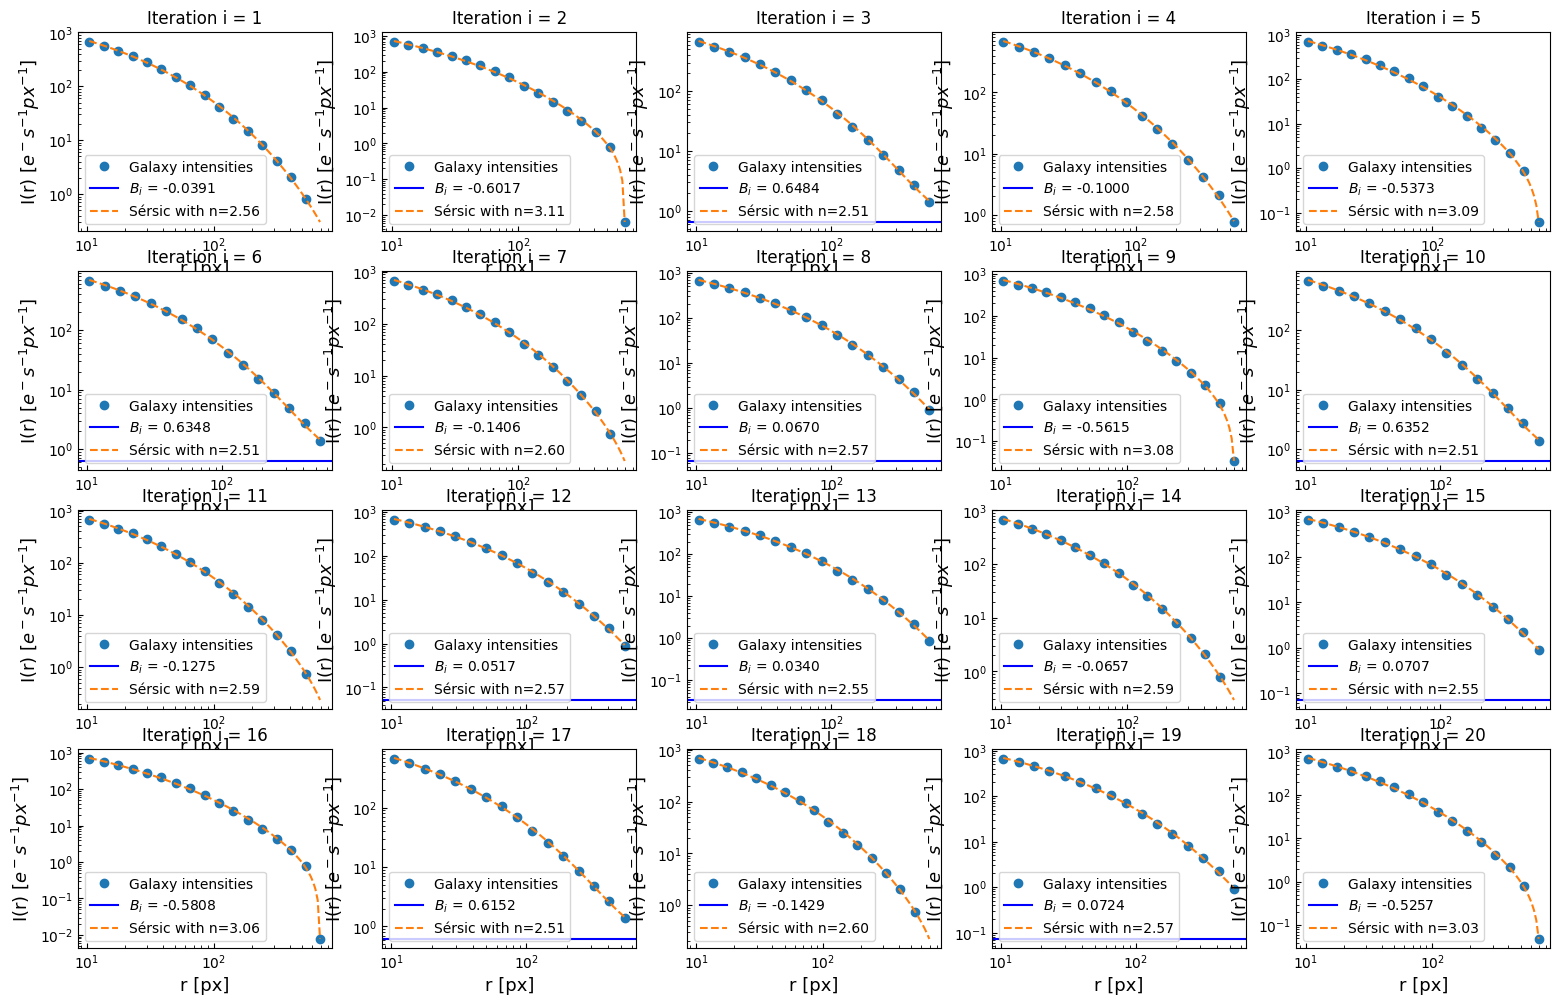

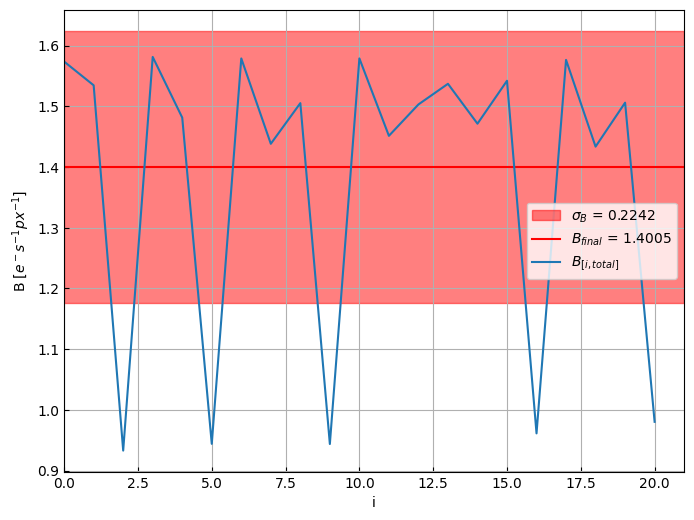

Folder 'data/NGC 1404/F160W/return_files_drz/2.iterate_background_noise' created in directory:
/root/MasterThesis/SBF_Pipeline/example

3. Fitting the initial ellipse model ...
Folder 'data/NGC 1404/F160W/return_files_drz/3.initial_ellipse_model' created in directory:
/root/MasterThesis/SBF_Pipeline/example

4. Find the initial source mask ...


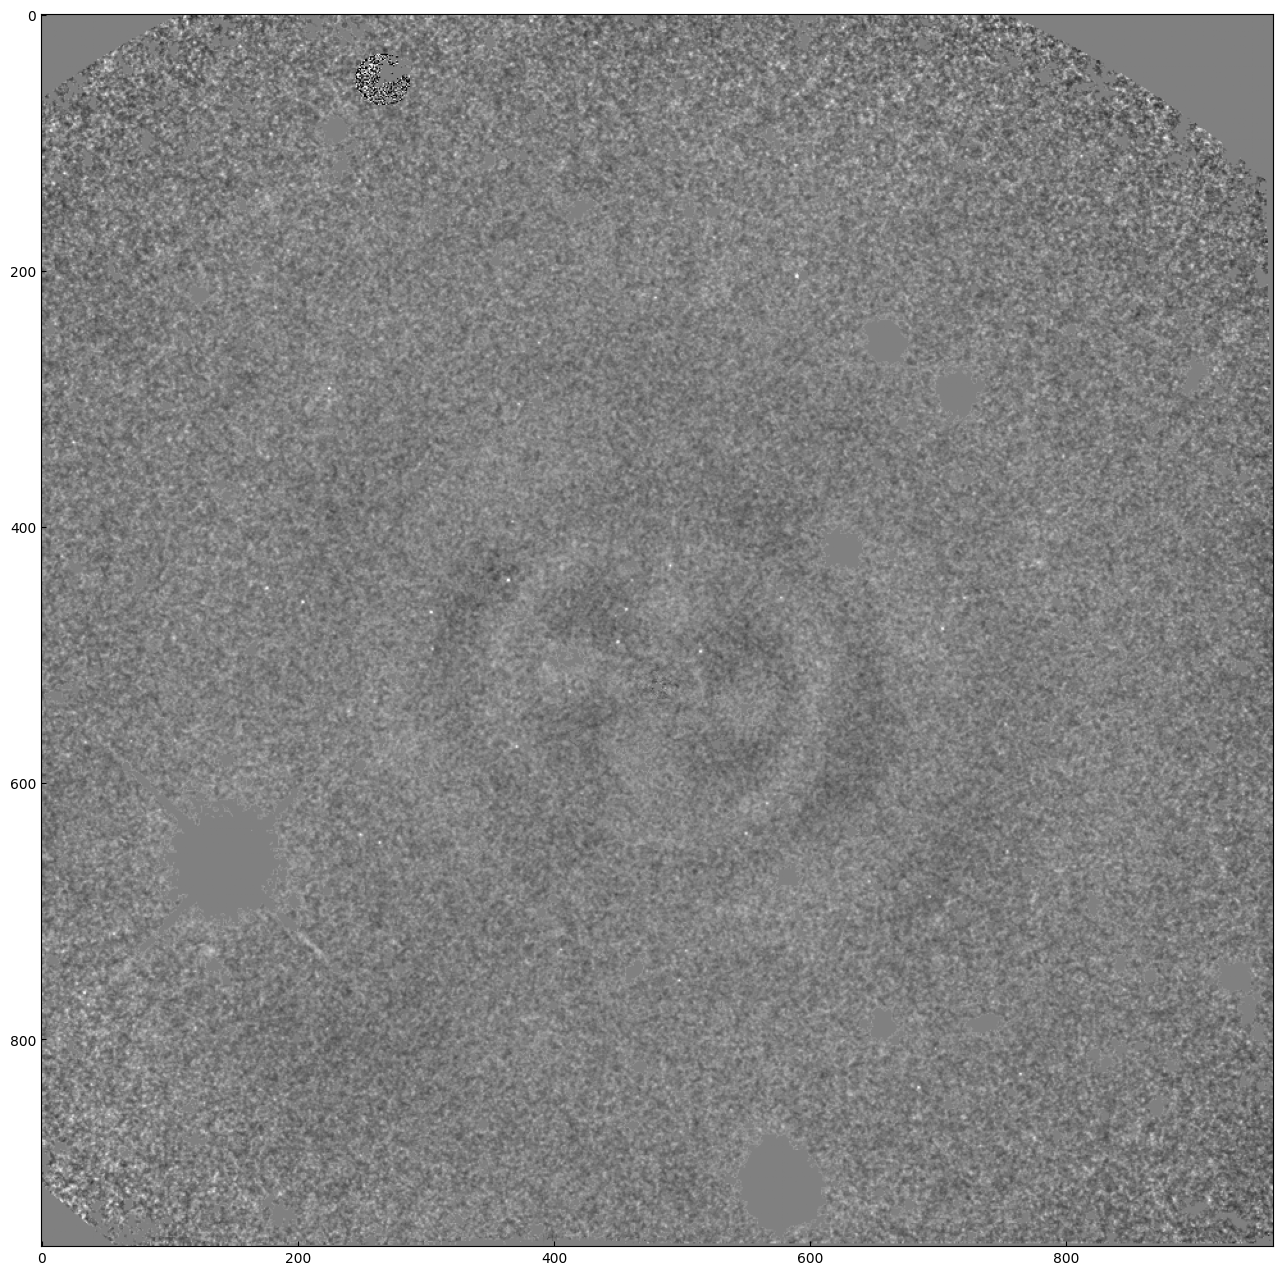

Folder 'data/NGC 1404/F160W/return_files_drz/4.initial_source_mask' created in directory:
/root/MasterThesis/SBF_Pipeline/example

5. Fitting the final ellipse model ...
Folder 'data/NGC 1404/F160W/return_files_drz/5.final_ellipse_model' created in directory:
/root/MasterThesis/SBF_Pipeline/example

6. Find the final source mask ...


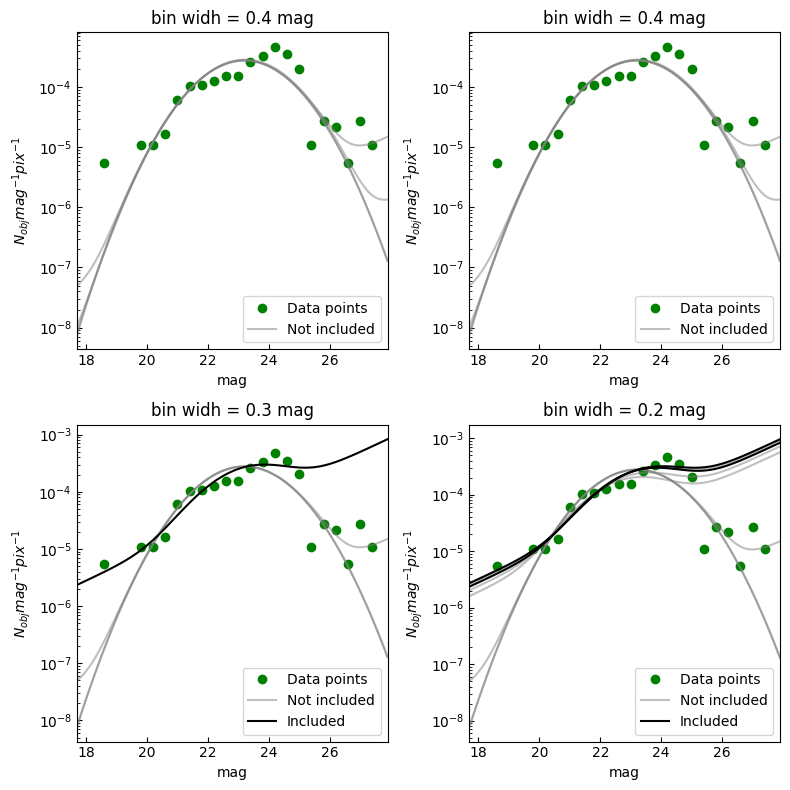

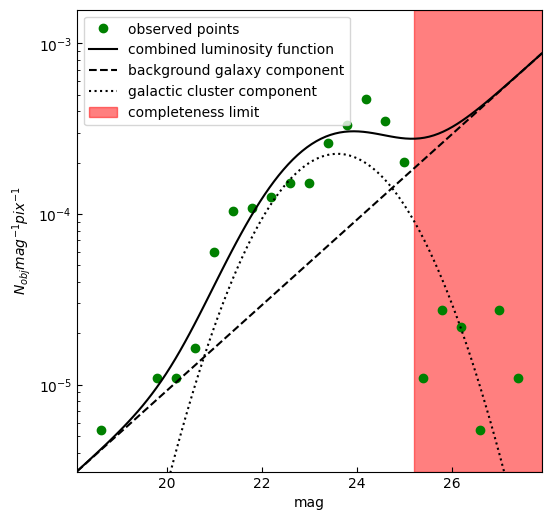

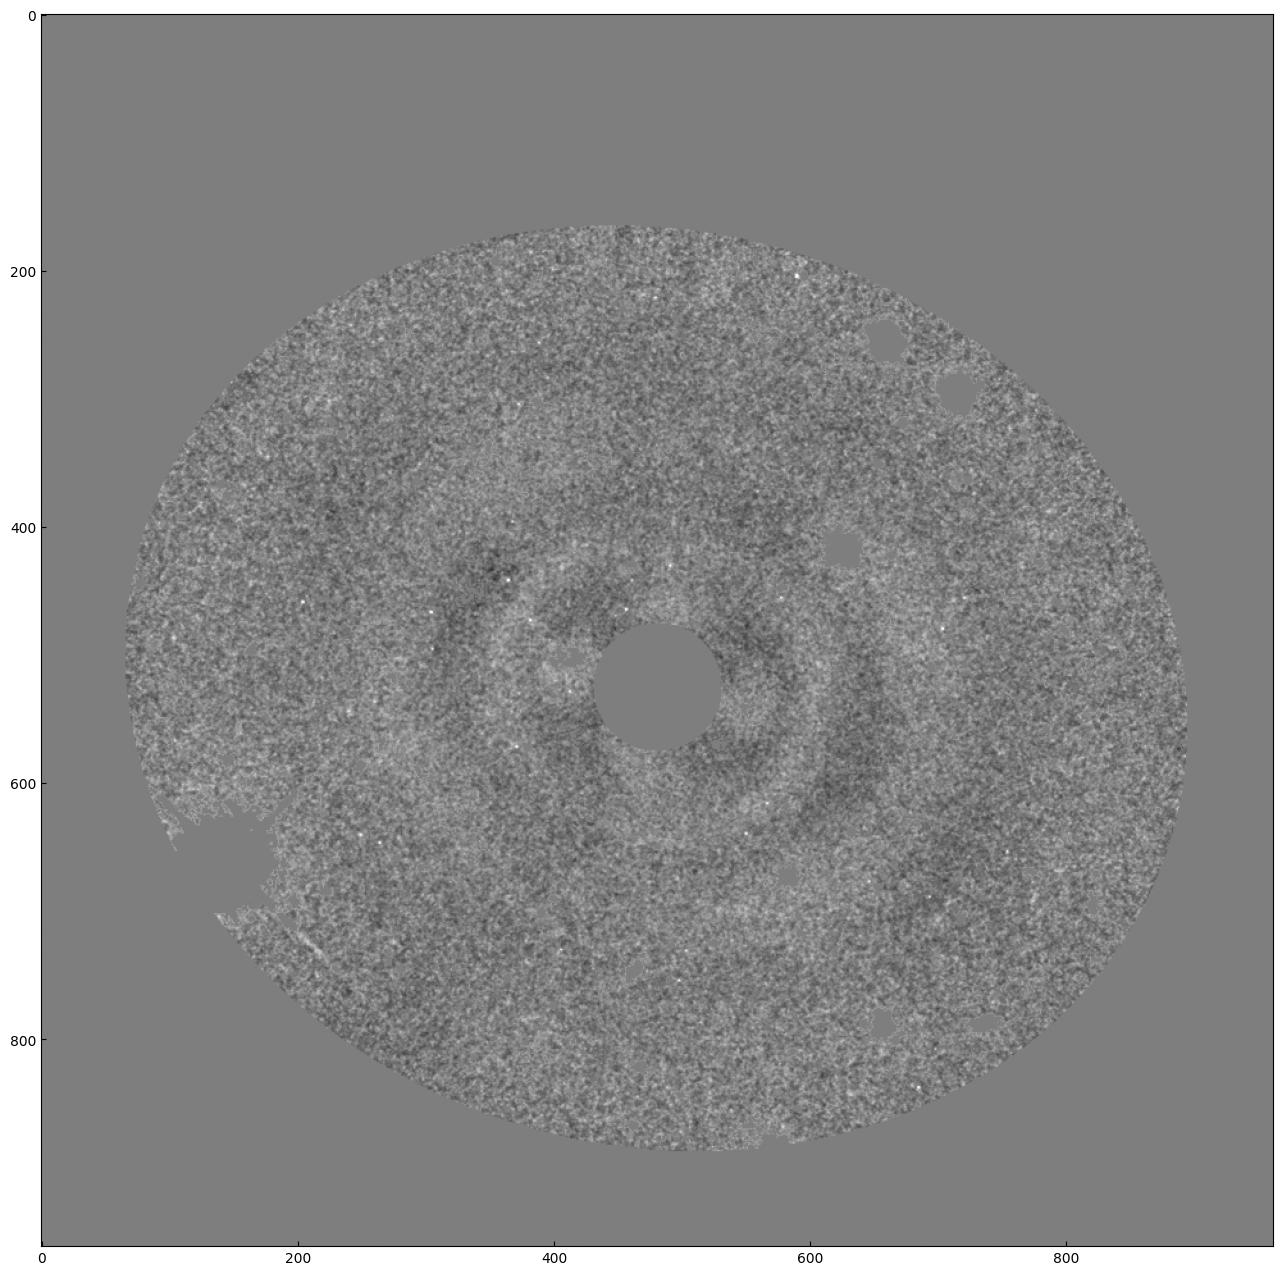

Folder 'data/NGC 1404/F160W/return_files_drz/6.final_source_mask' created in directory:
/root/MasterThesis/SBF_Pipeline/example

7. Compute the required variables ...
Folder 'data/NGC 1404/F160W/return_files_drz/7.main_variables' created in directory:
/root/MasterThesis/SBF_Pipeline/example

8. Extract PSF objects and model PSF ...


/root/MasterThesis/SBF_Pipeline/sbf_pipeline.py:37: RuntimeWarning: divide by zero encountered in divide
  nri = (data - model_final)/np.sqrt(model_final)


  0%|          | 0/104 [00:00<?, ?it/s]

No suitable PSF sources found.
Folder 'data/NGC 1404/F160W/return_files_drz/8.psf_objects' created in directory:
/root/MasterThesis/SBF_Pipeline/example

9. Fit the SBF components
No psf sources found, no SBF amplitude fit
Folder 'data/NGC 1404/F160W/return_files_drz/9.sbf_components' created in directory:
/root/MasterThesis/SBF_Pipeline/example

10. Calculating SBF signal with library psf ...


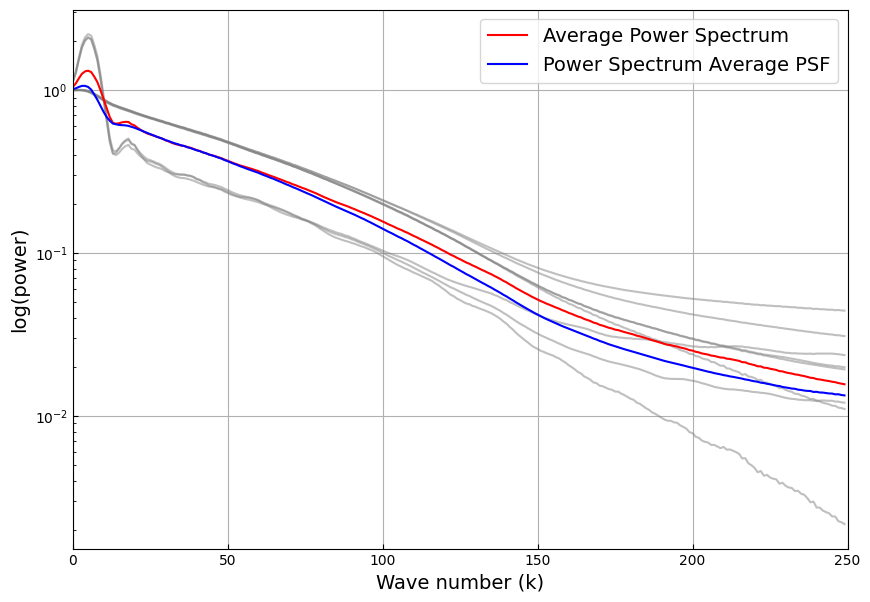

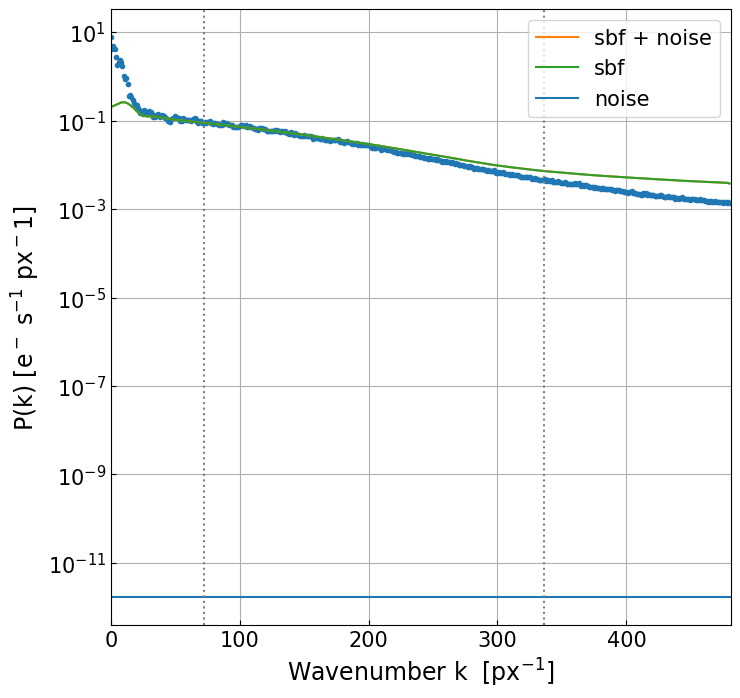

Folder 'data/NGC 1404/F160W/return_files_drz/10.library_psf_analysis' created in directory:
/root/MasterThesis/SBF_Pipeline/example

11. Calculating the uncertainties ...
finding the different psf power spectra ...


  0%|          | 0/8 [00:00<?, ?it/s]

finding the kfit sigma ... 


/root/MasterThesis/SBF_Pipeline/functions/sbfuncertainties.py:168: RuntimeWarning: divide by zero encountered in divide
  nri_top = nri + (sigma_background/np.sqrt(image_model)) * mask_combined
/root/MasterThesis/SBF_Pipeline/functions/sbfuncertainties.py:169: RuntimeWarning: divide by zero encountered in divide
  nri_bot = nri - (sigma_background/np.sqrt(image_model)) * mask_combined


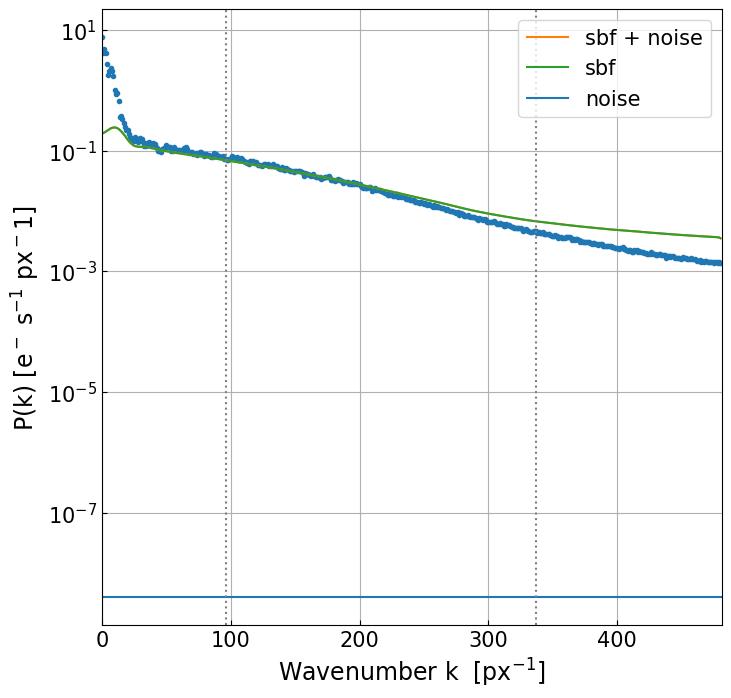

Folder 'data/NGC 1404/F160W/return_files_drz/11.uncertainties' created in directory:
/root/MasterThesis/SBF_Pipeline/example


In [3]:
# run the sbf pipeline

output = sbfPipeline(data_path_NGC1404_F160W,             # path where the fits files are stored
                     file_path_NGC1404_F160W,             # path where the returned data products must be stored
                     bool_files = [1,1,1],                # boolean array indicating the following things
                                                          #    idx 0: Try to extract data products from file_path_xxx -> Yes or No
                                                          #    idx 1: If no files present, do we want to compute the variables -> Yes or No
                                                          #    idx 2: If computed, do we want to store the variables -> Yes or N0
                     file_type="dr",                      # file type; "flt" or "dr"
                     obs_filter="F160W",                  # Filter
                     print_information=True,              # Print the info from the pipeline
                     make_plots =True,                    # Do we want to make plots 
                     return_variables=False,              # return the array of variables in output?
                     save_images=True,                    # Create graphs yes/no?
                     image_path=image_path_NGC1404_F160W, # If images must be stored, present the image path here.
                     lib_psf_peak_flux=0.1,               # Changed to 0.1 since working with F160W, see thesis Lei
                     estimate_initial_background=True, 
                     gal_bckgr_frac=0.6,
                     central_mask_radius=50)